# Lista de exercícios 4

In [22]:
! pip install opencv-python

    100% |████████████████████████████████| 24.9MB 29kB/s 
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [23]:
import numpy as np

from keras.layers import Convolution2D, MaxPooling2D, Activation
from keras.models import Sequential


import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

### 1. Explique a figura abaixo, relacionando, redes neurais convolucionais e big data.

Em um ambiente de Big Data, temos uma gigante quantidade de dados disponíveis. Porém, por muito tempo, houve grande dificuldade em se obter inteligência a partir desses dados com uso de machine learning tradicional. Em especial quando esses dados são não estruturados, presente em imagens, áudio e texto. Com a evolução de Deep Learning, diversas ferramentas tornaram-se disponíveis. Entre elas, se destaca o filtro convolucional mostrado na figura, que é uma ferramente imprecindível para lidar com imagens atualmente. Esses filtros são treinados na rede neural, completando um modelo muito eficiente para tratar imagens.

### 2. Explique com suas palavras o funcionamento de uma operação de convolução. Dê um exemplo numérico não apresentado em sala. Se desejar utilize a planilha em excel disponibilizada pelo professor.

Convolução é uma operação matemática realizada com duas funções, sendo muito utilizada no processamento de sinais. A convolução de dois sinais é dado pela seguinte fórmula:
$$(f * g)(t) = \int_{-\infty}^{\infty} f(\tau)g(t-\tau)d\tau$$
Enquanto a convolução de dois sinais discretos é dado pela fórmula:
$$(f * g)(k) = \sum_{j=0}^{k} f(j)g(k-j)$$
Ou seja, o resultado de uma convolução é dado pela superposição de ambas funções, através da somatória dos produtos dos pontos sobrepostos.
Pensando de maneira intuitiva, é como se uma das funções agisse como um filtro que se movimentasse ao longo de outra função. Em cada passo, é calculado um ponto resultante, que é dado pela somatória das multiplicações de todos os pontos sobrepostos.
Isso pode ser visto na planilha em excel disponibilizada pelo professor. São dadas duas matrizes (que seriam  equivalentes a funções discretas) e o resultado da operação em cada ponto é dado pelas fórmulas de Excel: `SOMARPRODUTO(A1:C3;I3:K5)`, `SOMARPRODUTO(C1:E3;I3:K5)`, `SOMARPRODUTO(E1:G3;I3:K5)`, etc. Se observarmos as fórmulas, notamos que a segunda matriz é fixada, enquanto há variação de ponto a ponto da primeira matriz.

### 3. Qual a relação entre a escolha de funções de ativação e o número de camadas em uma rede neural artificial?

Dependendo da função de ativação escolhida, encontramos o problema de vanishing gradients. Isso acontece porque funções como sigmoid ou tangente hiperbólica possuem grande variação perto do zero, enquanto pouca ou nenhuma variação nas bordas. Pouca variação causa gradientes mais baixos, o que faz com que as alterações feitas nos passos de otimização são menores. Esse problema se agrava com múltiplas camadas, visto que o gradiente que vem do erro, após ser multiplicado várias vezes pelas funções de ativação das camadas intermediárias, vai ficando cada vez mais baixo. Então, mesmo nos pontos próximos de zero, esses gradientes nas primeiras camadas fica tão baixo que há pouquíssima alteração de pesos durante o treinamento nessas camadas. Por isso, caso essas funções de ativação sejam utilizadas, a adição de camadas não é efetiva. Isso faz com que funções como RELU sejam utilizadas. Apesar de possuir gradiente constante em sua parte positiva, o que pode reduzir um pouco a convergência, ela ajuda a combater o vanishing gradient, fazendo com que as primeiras camadas também possam ser treinadas em redes profundas.

### 4. Como acontece o compartilhamento de pesos em uma camada convolucional?

Ao invés de todos os neurônios das camadas estarem interconectados, possuindo um peso para cada par de neurônios, cada neurônio da camada convolucional está conectado a determinado grupo de neurônios da camada anterior. A quantidade de neurônios é decidido pelo tamanho do kernel.

Visto que uma camada convolucional tem por objetivo extrair features e é desejado essas features sejam detectadas independente de sua posição na imagem, todos os neurônios da camada convolucional compartilham os mesmos pesos. Supondo um kernel de 5x5, existe uma matriz com 25 pesos. Ao invés de cada neurônio possuir uma matriz dessas, existe uma única matriz e ela é compartilhada por todos os neurônios de um kernel. Vale lembrar que uma camada convolucional pode ter múltiplos kernels e que não existe compartilhamento de peso entre kernels diferentes.

### 5. Explique com suas palavras o funcionamento da camada de pooling. Dê um exemplo numérico não apresentado em sala.

A camada de pooling tem por função compactar a informação espacial presente na camada anterior sem grande perda da mesma. Com isso, ganha-se performance computacional, redução de parâmetros (o que pode ajudar a reduzir over-fitting) e alguma invariância à translação.

Ela funciona através do particionamento da saída da camada anterior de forma que cada partição gere apenas uma resposta. Existem três tipos de camada de pooling: min, average e max. A Min Pooling retorna como resposta o valor mínimo exibido por partição, enquanto o Average Pooling calcula a média e o Max Pooling retorna o valor máximo.

Para exemplificar, podemos considerar que a saída da convolução anterior foi a seguinte matriz:

In [6]:
X = np.array([[1, 1, 2, 4],
              [5, 6, 7, 8],
              [3, 2, 1, 0],
              [1, 2, 3, 4]])

Se considerarmos uma camada de pooling com kernel 2x2 e stride 2, teremos as seguintes partições:

In [7]:
X1 = np.array([[1, 1],
               [5, 6]])
X2 = np.array([[2, 4],
               [7, 8]])
X3 = np.array([[3, 2],
               [1, 2]])
X4 = np.array([[1, 0],
               [3, 4]])

Se considerarmos Max Pooling, teremos:

In [13]:
np.array([[X1.max(), X2.max()],
          [X3.max(), X4.max()]])

array([[6, 8],
       [3, 4]])

### 6. Suponha uma imagem 32x32x5 e um filtro com kernel 5x5x5. Se não utilizarmos padding qual será a dimensão da saída da operação?

Considerando stride de 1, a saída será de 28x28x5.

### 7. Quais são os principais aspectos de projeto de uma arquitetura de rede convolucional?

- Quantidade de camadas convolucionais e de pooling (e a ordem das mesmas).
- Tamanho de filtro das camadas convolucionais. Isso controla o nivel de detalhe dectectado pelo filtro.
- Valor de stride das camadas convolucionais. Indica de quantos em quantos pixels será a "caminhada" do filtro. Quanto maior, menor será a imagem resultante. Porém, poderá perder detalhes.
- Quantidade de filtros das camadas convolucionais. Isso controla a quantidade de potenciais features extraídas por camada.
- Tipo das camadas de pooling: max, average e min. Isso controla como estamos compactando nossas features.
- Tamanho das camadas de pooling. Quanto maior, maior a compactação. Por um lado, mais dados são perdidos. Por outro, reduz mais a imagem, o que poupa processamento.
- Função de ativação das camadas convolucionais. É importante para garantir o treinamento das camadas anteriores.
- Configuração do classificador final, que costuma ser MLP. Para ele, temos a quantidade de camadas, neurônios por camada e funções de ativação.
- Otimizador a ser utilizado com seus hyperparâmetros, como taxa de aprendizagem.
- Tamanho do batch de treinamento. Quanto maior o valor, mais rápido e estável o treinamento, mas menor é a estocasticidade. O nível de estocasticidade é importante para equilibrar exploration e exploitation.
- Quantidade de épocas de treinamento. Isso implica no tempo de treinamento e possivelmente no resultado final.

### 8. Escolha o framework de deep learning de sua preferência. Apresente textualmente como uma rede neural convolucional pode ser implementada neste framework.

O Keras possui implementações de camadas de convolução. Uma das maneiras mais fáceis e que evita o cálculo das dimensões de entrada de cada camada é o uso da classe `Sequential`. Essa classe permite a adição de várias camadas na rede neural, de diversos tipos, sendo necessário indicar apenas as dimensões de entrada da primeira camada, sendo que o restante é calculado automaticamente. Além disso, ele permite compilar o modelo, selecionando o otimizador a ser utilizado no treinamento, adicionando métricas de avaliação, callbacks para salvar o modelo e parar o treinamento mais cedo, entre outros. Por fim, um histórico é gerado contendo todas as métricas desejadas.

### 9. Utilizando o código procure_o_gato_com_cnn.py, monte um notebook com o código, explicando passo a passo o resultado obtido.

Carrega a imagem do gato e mostra na tela:

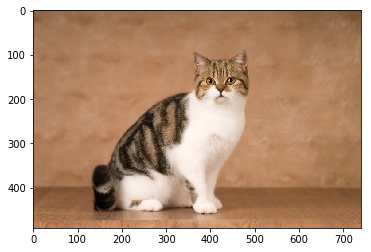

In [48]:
#cat = cv2.imread('cat.jpg')
# Corrigido para o formato RGB ao invés de BGR retornado pelo cv2.imread()
cat = cv2.cvtColor(cv2.imread('cat.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(cat)

Mostra o formato lido da imagem. Nota-se que existe uma matriz de duas dimensões e 3 canais (RGB).

In [30]:
cat.shape

(491, 740, 3)

Criação de um modelo com uma única camada convolucional com 3 kernels 3x3.

In [49]:
model = Sequential()
model.add(Convolution2D(3, (3,3), input_shape=cat.shape))

Preparação da entrada da rede e obtenção da saída processada. O expand_dims é necessário porque o método predict() espera um batch de entradas, mas estamos passando apenas uma.

In [42]:
cat_batch = np.expand_dims(cat,axis=0)
conv_cat = model.predict(cat_batch)

Definição de uma função para mostrar o resultado e invocação da mesma. Deve-se notar que o resultado será uma matriz para cada filtro. Nesse caso, são 3 filtros, assim como os 3 canais de RGB. Logo, o plt.imshow() tentará mostrar essa saída como se fosse uma imagem em RGB.

(489, 738, 3)


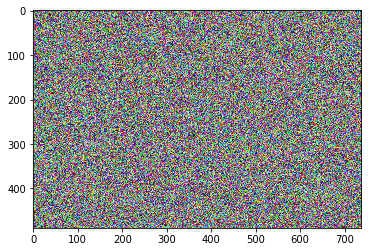

In [50]:
def visualize_cat(model, cat):
    cat_batch = np.expand_dims(cat,axis=0)
    conv_cat = model.predict(cat_batch)
    conv_cat = np.squeeze(conv_cat, axis=0)
    print(conv_cat.shape)
    plt.imshow(conv_cat)
    
visualize_cat(model, cat)

Como não houve treinamento da rede, os 3 filtros foram inicalizados de forma aleatória. Isso explica o resultado mostrado.

Abaixo, uma nova camada convolucional foi criada para processar a imagem. Dessa vez, contendo um kernel 10x10.

(482, 731, 3)


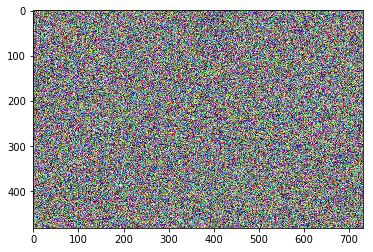

In [51]:
model = Sequential()
model.add(Convolution2D(3, (10,10), input_shape=cat.shape))

visualize_cat(model, cat)

Uma nova função é criada para mostrar o resultado da rede. Essa foi criada para imagens resultantes em um único canal. Por isso, é feito um reshape para reduzir para um único canal.

In [64]:
def imprime_gatinho_fofo(model, cat):
    cat_batch = np.expand_dims(cat,axis=0)
    conv_cat2 = model.predict(cat_batch)
    conv_cat2 = np.squeeze(conv_cat2, axis=0)
    print(conv_cat2.shape)
    conv_cat2 = conv_cat2.reshape(conv_cat2.shape[:2])
    print(conv_cat2.shape)
    plt.imshow(conv_cat2)

Um novo modelo é criado com uma camada convolucional com 1 kernel 3x3.

(489, 738, 1)
(489, 738)


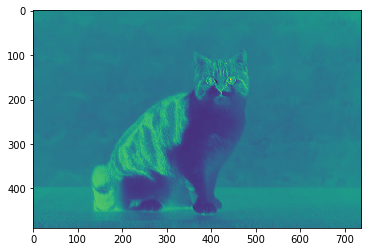

In [65]:
model = Sequential()
model.add(Convolution2D(1, (3,3), input_shape=cat.shape))

imprime_gatinho_fofo(model, cat)

Por se tratar de um único canal, o resultado torna-se mais visível. Anteriormente, a mistura dos 3 canais e a interpretação do plt como RGB estava tornando difícil a visualização. Entretanto, o filtro da camada convolucional continua aleatório. Isso pode ser notado ao se executar o código acima múltiplas vezes. Cada vez um resultado diferente será retornado. Vale notar que a imagem está com tons de verde e amarelo porque não foi passado `cmap='gray'` para o plt.imshow().

Uma camada com 1 kernel de 15x15 é aplicado.

(477, 726, 1)
(477, 726)


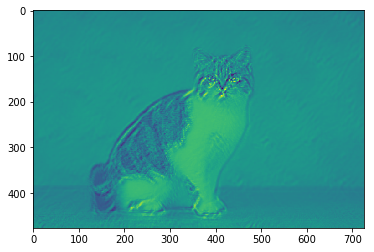

In [69]:
model = Sequential()
model.add(Convolution2D(1, (15,15),input_shape=cat.shape))

imprime_gatinho_fofo(model, cat)

Com o uso de um filtro maior, nota-se que a imagem parece mais "borrada".

Uma camada com 1 kernel 3x3, porém com função de ativação RELU:

(489, 738, 1)
(489, 738)


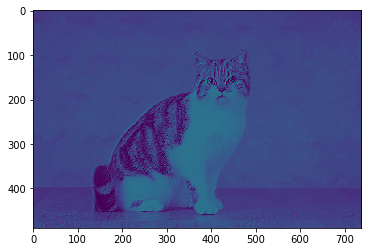

In [74]:
model = Sequential()
model.add(Convolution2D(1, (3,3),input_shape=cat.shape))
model.add(Activation('relu'))

imprime_gatinho_fofo(model, cat)

A função de ativação RELU apenas zera valores negativos, o que não é muito perceptível no caso acima.

Agora uma camada com 3 filtros 3x3 e ativação RELU é criada.

(489, 738, 3)


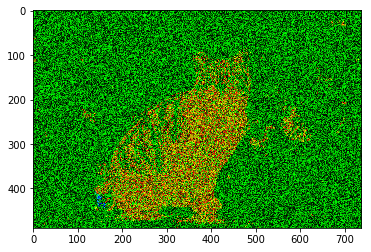

In [80]:
model = Sequential()
model.add(Convolution2D(3,(3,3),input_shape=cat.shape))
model.add(Activation('relu'))

visualize_cat(model, cat)

A função de ativação, ao zerar os valores negativos, fez com que pelo menos partes do gato sejam visíveis na imagem resultante.

Uma nova rede com uma camada convolucional com 1 filtro 3x3 e uma camada de pooling 5x5 é criada abaixo.

(97, 147, 1)
(97, 147)


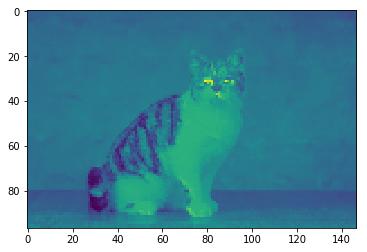

In [84]:
model = Sequential()
model.add(Convolution2D(1,(3,3),input_shape=cat.shape))
model.add(MaxPooling2D(pool_size=(5,5)))

imprime_gatinho_fofo(model, cat)

Podemos notar que o resultado da imagem parece o mesmo que os anteriores. Porém, ao olharmos para a dimensão da imagem, podemos ver que ela diminuiu. Isso demonstra que o pooling comprime o tamanho da imagem sem perder tanta informação.

(97, 147, 3)


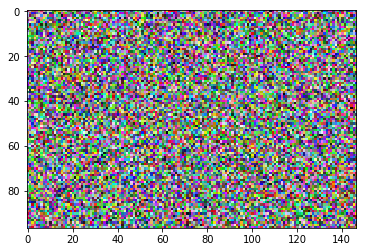

In [86]:
model = Sequential()
model.add(Convolution2D(3, (3,3),input_shape=cat.shape))
model.add(MaxPooling2D(pool_size=(5,5)))
visualize_cat(model, cat)

O mesmo pode ser notado com mais filtros.

(97, 147, 1)
(97, 147)


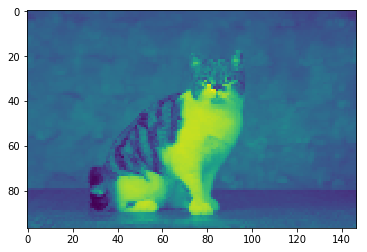

In [89]:
model = Sequential()
model.add(Convolution2D(1, (3,3),input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

imprime_gatinho_fofo(model, cat)

E também com a função de ativação RELU.

(97, 147, 3)


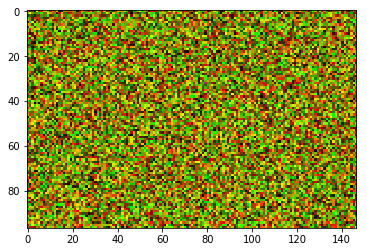

In [99]:
model = Sequential()
model.add(Convolution2D(3, (3,3), input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

visualize_cat(model, cat)

Uma rede mais complexa é criada, a qual aplica duas camadas convolucionais com 1 filtro 3x3 e utiliza relu e max pooling 3x3.

(53, 81, 1)
(53, 81)


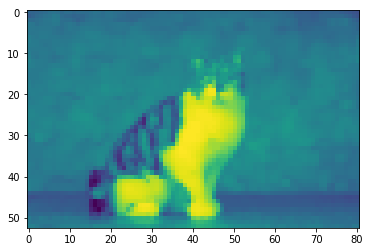

In [101]:
model = Sequential()
model.add(Convolution2D(1, (3,3), input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Convolution2D(1, (3,3), input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

imprime_gatinho_fofo(model, cat)

Novamente notamos padrões aleatórios a cada vez que rodamos o código. A aplicação de duas camadas e convolução e duas de pooling reduziu bastante o tamanho da imagem resultante.

(80, 122, 1)
(80, 122)


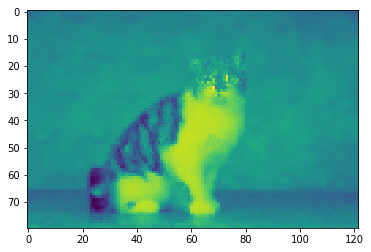

In [103]:
model = Sequential()
model.add(Convolution2D(3,(3,3),input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Convolution2D(1,(3,3),input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

imprime_gatinho_fofo(model, cat)

Dessa vez, a primeira camada apresentou 3 filtros, mas a última apenas um. Também, o pooling final foi reduzido para 2x2. Com isso, a imagem final ficou maior que a anterior, que recebeu maior pooling.

(80, 122, 3)


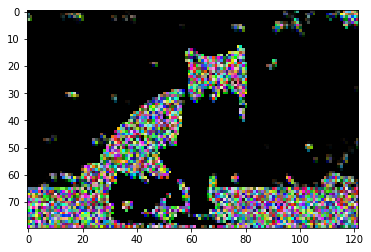

In [106]:
model = Sequential()
model.add(Convolution2D(3, (3,3), input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Convolution2D(3, (3,3), input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

visualize_cat(model, cat)

O padrão resultante continua aleatório, mas algumas vezes demonstra partes do corpo do gato. O resultado final possui 3 canais devido à última camada de convolução ter 3 filtros. A imagem também está maior do que a versão que possuía pooling 3x3 nas duas camadas.

### 10. Utilizando o código CNN_simples.py (código em tensorflow) execute o código e verifique a taxa de acerto obtida. Faça alterações na rede de modo a melhorar essa taxa. Caso não disponha de uma GPU em seu computador reduza a quantidade de objetos e de classes do problema.